In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your scenario summary table
csv_path = "../../data/Weather_Data/scenario_outputs/scenario_rules_report.csv"

scenarios = pd.read_csv(csv_path)
scenarios


,scenario_label,day_type,temp_bin,rain_flag,avg_multiplier,min_multiplier,max_multiplier,typical_rebalancing,typical_staffing,n_hours
0,"Baseline: dry weekday, 10–15°C",weekday,10-15,dry,1.000000,1.000000,1.000000,normal,normal,24
1,"Cold rainy weekday, 5–10°C",weekday,5-10,rain,0.589429,0.370225,0.816610,low,reduced_shift,23
2,"Warm dry weekend, 25–30°C",weekend,25-30,dry,1.790581,0.286856,3.584291,high,peak_extra_shift,16


In [ ]:
# Average multiplier is already in the table (avg_multiplier)
scenarios["delta_percent"] = (scenarios["avg_multiplier"] - 1.0) * 100

scenarios[["scenario_label", "avg_multiplier", "delta_percent"]]


,scenario_label,avg_multiplier,delta_percent
0,"Baseline: dry weekday, 10–15°C",1.000000,0.000000
1,"Cold rainy weekday, 5–10°C",0.589429,-41.057101
2,"Warm dry weekend, 25–30°C",1.790581,79.058099


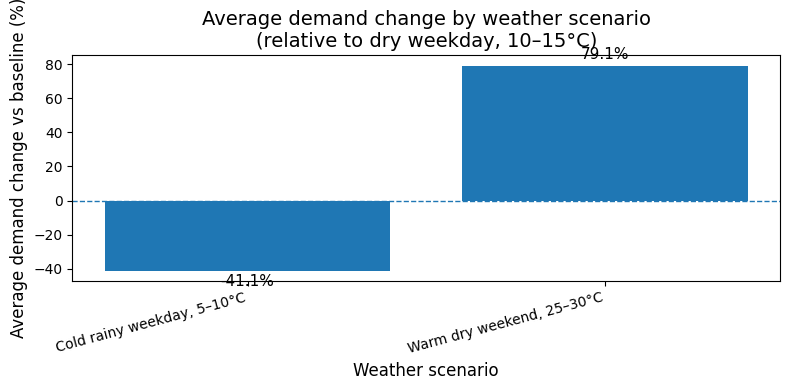

In [5]:
scenarios = [
    "Cold rainy weekday, 5–10°C",
    "Warm dry weekend, 25–30°C"
]
changes = [-41.1, 79.1]  # % change vs baseline

fig, ax = plt.subplots(figsize=(8, 4))

# Bar chart for the two non-baseline scenarios
bars = ax.bar(scenarios, changes)

# Horizontal line at 0% to indicate the baseline level
ax.axhline(0, linewidth=1, linestyle="--")

# Add percentage labels on each bar
for bar, value in zip(bars, changes):
    height = bar.get_height()
    if value >= 0:
        # Text slightly above positive bars
        y = height + 2
        va = "bottom"
    else:
        # Text slightly below negative bars
        y = height - 2
        va = "top"

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        y,
        f"{value:.1f}%",
        ha="center",
        va=va,
        fontsize=11
    )

# Titles and axis labels with normal-sized fonts
ax.set_title(
    "Average demand change by weather scenario\n"
    "(relative to dry weekday, 10–15°C)",
    fontsize=14
)
ax.set_ylabel("Average demand change vs baseline (%)", fontsize=12)
ax.set_xlabel("Weather scenario", fontsize=12)

# Tick label size (x and y axes)
ax.tick_params(axis="both", labelsize=10)

# Slight rotation so scenario labels are easy to read
plt.setp(ax.get_xticklabels(), rotation=15, ha="right")

plt.tight_layout()
plt.show()